<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Micro-Fading-analysis" data-toc-modified-id="Micro-Fading-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Micro-Fading analysis</a></span><ul class="toc-item"><li><span><a href="#INFO-file" data-toc-modified-id="INFO-file-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>INFO file</a></span></li><li><span><a href="#BS-file" data-toc-modified-id="BS-file-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>BS file</a></span></li><li><span><a href="#Fading-file" data-toc-modified-id="Fading-file-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fading file</a></span></li></ul></li><li><span><a href="#Power" data-toc-modified-id="Power-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Power</a></span></li><li><span><a href="#Reflectance" data-toc-modified-id="Reflectance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reflectance</a></span></li></ul></div>

# Import

In [1]:
%pylab inline

import os
import colour
import pandas as pd
from pandas import set_option
import Process_raw

from glob import glob

set_option('display.max_rows', 30)

%load_ext watermark
%load_ext autoreload
%autoreload 2

%load_ext blackcellmagic

Populating the interactive namespace from numpy and matplotlib


/home/gus/anaconda3/lib/python3.8/site-packages/colour/utilities/verbose.py:237: ColourUsageWarning: "colour.models.XYZ_to_colourspace_model" object is deprecated and will be removed in a future release.
  warn(*args, **kwargs)


In [2]:
%watermark -a 'Gauthier Patin' -d -t -v -p numpy

Author: Gauthier Patin

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

numpy: 1.19.2



In [3]:
project = '3.4.9'

# Micro-Fading analysis

## INFO file

In [4]:
dir_path = "/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Processed/MFT/"

date = "2022-02-18"

###### ANALYSIS DATA ######
Id = "MF.CAL01-C11.01"
power = 'P.0805' # give the power measurement number
distance = 24.0  # in mm
fiber = 'UV-400um-0.5'    # in µm
res = '0.6859'   # in µm/px
photo_nb = '01'
option = 'E.1.1'
zoom = 'x3.2'
filter = 'noFilter'
lamp = 'HPX1'


# run the script to export the rawdata and process them
Process_raw.MFT_INFO_file(
    dir_path,
    date,
    Id,
    project,
    power,
    distance,
    fiber,
    res,
    filter,
    nb =photo_nb,
    option = option,
    zoom = zoom,
    lamp = lamp
)


## BS file

In [11]:
cd/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Raw/Photos/To_process

/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Photos_Frank/Data/Raw/Photos/To_process


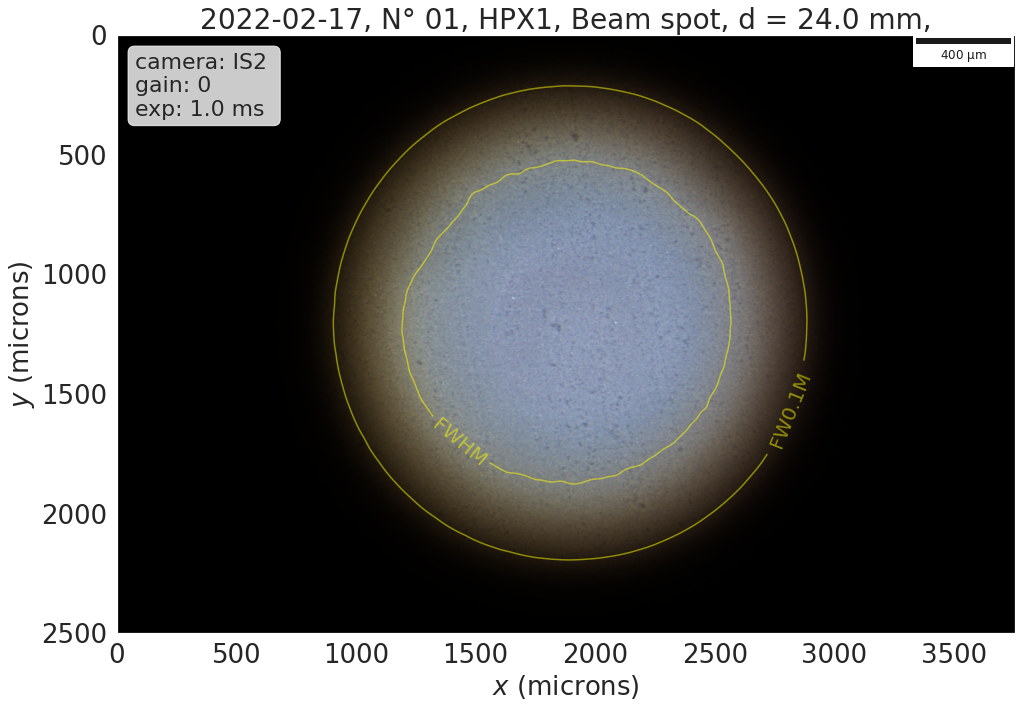

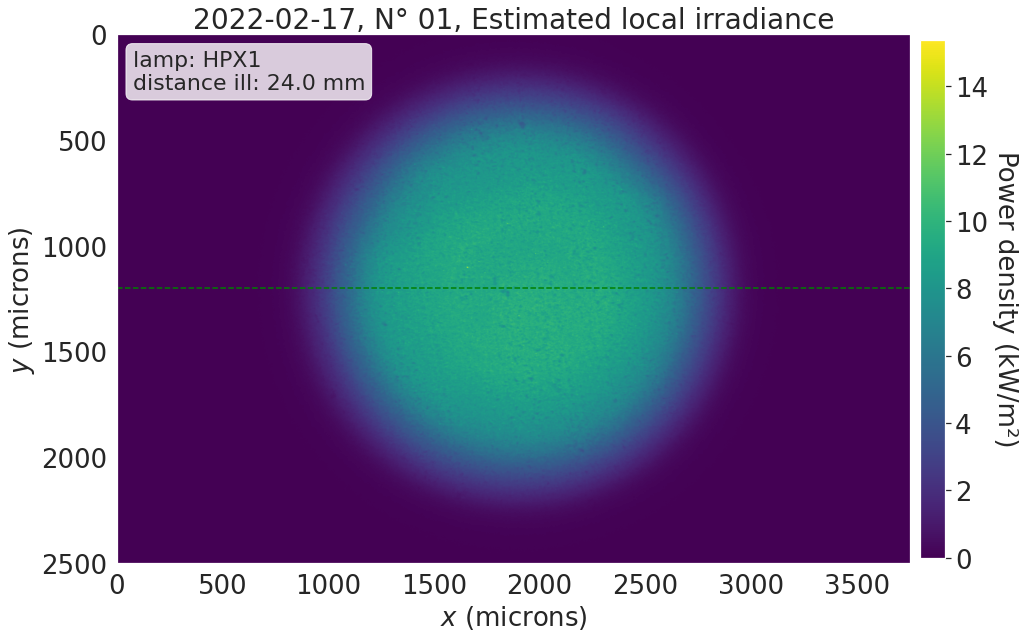

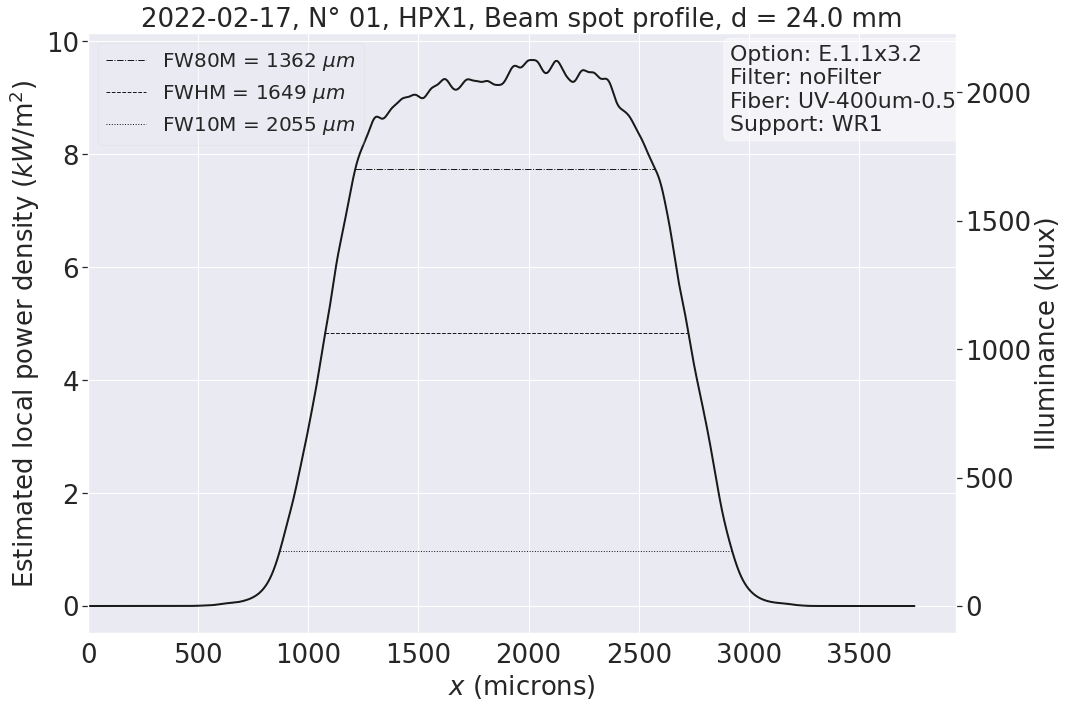

In [12]:
# we import all the txt file
files = sorted(glob('**'))

Process_raw.Beam_spot(files,project,line = 'horizontal',sigma = 30,MFT = 'yes',coord_x = 0.74,coord_y = 0.98)

## Fading file

In [7]:
cd/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Raw/MFT/To_process

/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Raw/MFT/To_process


In [6]:
# we import all the txt file
path = os.getcwd()
files = os.listdir(path)
files_txt = [f for f in files if f[-3:] == "txt"]


# run the script to export the rawdata and process them
Process_raw.MFT_Fading_file(files_txt,project)

# Power

In [6]:
cd/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Raw/Power/To_process

/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Raw/Power/To_process


In [6]:
# we import all the txt file
path = os.getcwd()
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv']

# run the script to export the rawdata and process them
Process_raw.Power(files_csv, project)

# Reflectance


In [5]:
cd/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Raw/RS/To_process

/home/gus/Documents/PhD/PhD_Projects/Part3_MFT_Application/3.4_MFT-external/3.4.9_Inktime_Frank/Data/Raw/RS/To_process


In [6]:
# import files
files = sorted(glob('**'))
text = 'cum_exp = 6hr'

# process the raw data
Process_raw.RS_KM_single(files, project, comments = True, text = text, DB = False)